#### Bước 1. Chuẩn bị môi trường

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Bước 2. Nạp và xem dữ liệu

In [2]:
df = pd.read_csv(r"C:\Users\22520\Downloads\archive\Student_performance_10k.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_score                9976 non-null   float64
 9   science_score                9977 non-null   float64
 10  total_score                  9981 non-null   float64
 11  grade                        9997 non-null   object 
dtypes: float64(6), object(6)
memory usage: 937.6+ KB


In [28]:
df.shape

(10000, 12)

In [29]:
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [5]:
df.describe()

,lunch,test_preparation_course,reading_score,writing_score,science_score,total_score
count,9976.000000,9977.000000,9975.000000,9976.000000,9977.000000,9981.000000
mean,0.644246,0.388694,70.125915,71.415798,66.063045,264.740908
std,0.478765,0.487478,19.026245,18.245360,19.324331,42.304858
min,0.000000,0.000000,17.000000,10.000000,9.000000,89.000000
25%,0.000000,0.000000,57.000000,59.000000,53.000000,237.000000
50%,1.000000,0.000000,71.000000,72.500000,67.000000,268.000000
75%,1.000000,1.000000,85.000000,85.000000,81.000000,294.000000
max,1.000000,1.000000,100.000000,100.000000,100.000000,383.000000


#### Bước 3. Làm sạch dữ liệu

In [3]:
df.isnull().sum()

roll_no                         1
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     24
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64

In [4]:
df= df.dropna()

In [5]:
df.isnull().sum()

roll_no                        0
gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
science_score                  0
total_score                    0
grade                          0
dtype: int64

#### Bước 4. Phân tích và trực quan hoá

In [ ]:
for col in df.columns:
    print(repr(col))

'roll_no'
'gender'
'race_ethnicity'
'parental_level_of_education'
'lunch'
'test_preparation_course'
'math_score'
'reading_score'
'writing_score'
'science_score'
'total_score'
'grade'


##### Chuyển cột 'math_score' về kiểu số

In [9]:
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')

##### Thêm cột điểm trung bình

In [10]:
df["average_score"] = df[["math_score","reading_score","writing_score"]].mean(axis=1)

##### 4.1 Phân phối điểm trung bình

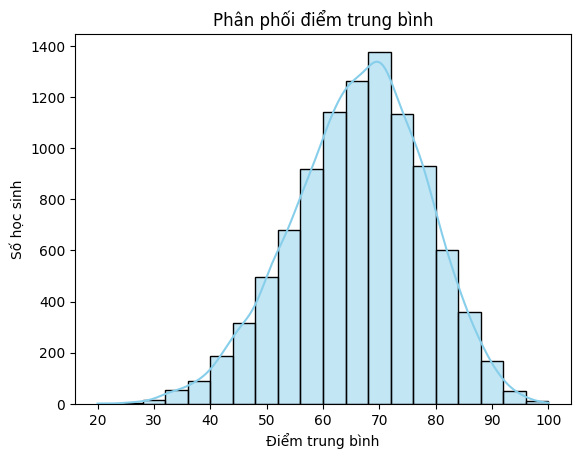

In [ ]:
sns.histplot(df["average_score"], kde=True, bins=20, color="skyblue")
plt.title("Phân phối điểm trung bình")
plt.xlabel("Điểm trung bình")
plt.ylabel("Số học sinh")
plt.show()

##### 4.2 So sánh điểm theo giới tính

In [6]:
df['gender'] = df['gender'].str.strip().str.lower()

In [7]:
df['gender'] = df['gender'].replace({
    'boy': 'male',
    'man': 'male',
    'girl': 'female',
    'woman': 'female'
})

D:\Temp\ipykernel_24804\4023083800.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="average_score", data=df, palette="Set2")


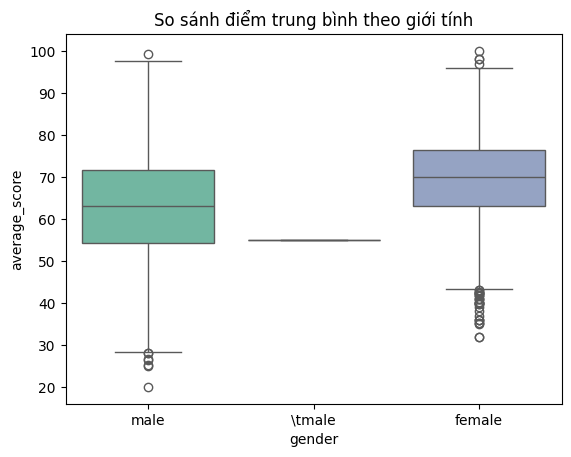

In [11]:
sns.boxplot(x="gender", y="average_score", data=df, palette="Set2")
plt.title("So sánh điểm trung bình theo giới tính")
plt.show()

##### 4.3 Điểm trung bình theo trình độ học vấn của phụ huynh

D:\Temp\ipykernel_12488\877156577.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="parental_level_of_education", y="average_score", data=df, ci=None, palette="viridis")
D:\Temp\ipykernel_12488\877156577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="parental_level_of_education", y="average_score", data=df, ci=None, palette="viridis")


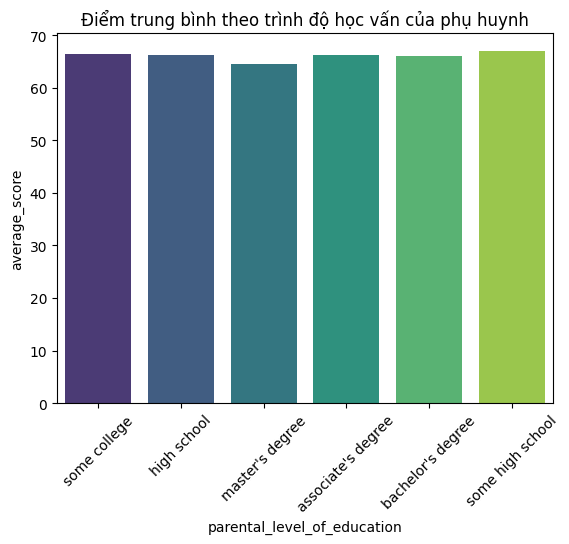

In [ ]:
sns.barplot(x="parental_level_of_education", y="average_score", data=df, ci=None, palette="viridis")
plt.xticks(rotation=45)
plt.title("Điểm trung bình theo trình độ học vấn của phụ huynh")
plt.show()